In [1]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor
from soynlp.noun import LRNounExtractor_v2

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
files = ['배우리프로_[team_wanna].json', '최남매_골프tv.json','프로랜서tv.json','프로허석[pro_golfer_heo].json', '박하림프로.json',
        '[골프맨]조윤성프로.json','김셩tv.json', '김현우프로[_wanna_golf_].json', '몬구골프.json','방프로_채널.json',
         '오지인tv.json','하와이골프_[박형준프로].json','홀인원tv.json','flow_golf최대룡.json', '유프로의_왕초보골프배우기.json',
         'dougkoh_channel.json','닥치고스윙_김준년프로.json','배재희프로의오늘의골프.json','[이기호프로]이지골프스튜디오.json','이종훈의2%골프.json',
         '최프로의_처음부터_풀스윙.json','스윙tv.json','스윙닥터김남기프로.json','박치우프로[park’s_golf].json','m_club_golf.json'] 

# 프로랜서, 최남매, 배우리, 프로허석, 박하림 8/4
# 조윤성, 김셩, 김현우, 몬구, 방프로, 오지인, 박형준, 홀인원, 최대룡, 유프로  8/5
# 나머지 8/6

df_frame={}
frames = []
for file in files:
    data = None
    with open(file, 'r') as f:
        data=json.load(f)

    channel_id, stats = data.popitem()
    video_stats = stats['video_data']

    video_data = []
    for vid in video_stats.items():
        video_id = vid[0]
        title = vid[1]['title']
        views = int(vid[1]['viewCount'])
        #likes = int(vid[1]['likeCount'])
        #dislikes = int(vid[1]['dislikeCount'])
        #comments = int(vid[1]['commentCount'])
        release = vid[1]['publishedAt']
        video_data.append([title, views, release, file[:-5]])

    video = pd.DataFrame(video_data, columns=['title','viewCount', 'release', 'channel'])
    video['release'] = video['release'].apply(lambda x: x[:10])
    video['release'] = pd.to_datetime(video['release'])
    df_frame[file] = video
    frames.append(df_frame[file])

video = pd.concat(frames)
video['viewCount/day'] = video['viewCount'] / ((pd.to_datetime('today') - video['release']).dt.days)
video['viewCount/day'] = video['viewCount/day'].astype('int')
video['estimated income'] = video['viewCount'] * 2
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 0 to 121
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             3751 non-null   object        
 1   viewCount         3751 non-null   int64         
 2   release           3751 non-null   datetime64[ns]
 3   channel           3751 non-null   object        
 4   viewCount/day     3751 non-null   int64         
 5   estimated income  3751 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 205.1+ KB


In [3]:
video.set_index('title', inplace=True)

## Channel별 요약
상승세: 몬구골프, 프로허석, 배재희프로, 프로랜서   
하락세: 김현우프로, 최남매, 방프로, 홀인원

In [4]:
video.groupby('channel').sum().sort_values('viewCount' ,ascending=False) # 누적조회수기준 정렬

,viewCount,viewCount/day,estimated income
channel,,,
김현우프로[_wanna_golf_],29208650,55784,58417300
[이기호프로]이지골프스튜디오,25982657,141817,51965314
[골프맨]조윤성프로,23946569,141413,47893138
하와이골프_[박형준프로],16996723,135174,33993446
프로허석[pro_golfer_heo],13868070,151972,27736140
flow_golf최대룡,13138692,49415,26277384
닥치고스윙_김준년프로,12638966,69262,25277932
m_club_golf,11707718,45118,23415436
최남매_골프tv,10906459,39059,21812918


In [5]:
video.groupby('channel').sum().sort_values('viewCount/day' ,ascending=False) # 누적일평균 조회수 정렬

,viewCount,viewCount/day,estimated income
channel,,,
프로허석[pro_golfer_heo],13868070,151972,27736140
[이기호프로]이지골프스튜디오,25982657,141817,51965314
[골프맨]조윤성프로,23946569,141413,47893138
하와이골프_[박형준프로],16996723,135174,33993446
배재희프로의오늘의골프,3350202,126349,6700404
몬구골프,9262852,120995,18525704
스윙닥터김남기프로,6464401,96159,12928802
유프로의_왕초보골프배우기,8084170,82946,16168340
닥치고스윙_김준년프로,12638966,69262,25277932


## 누적 조회수 기준 상위 10 동영상 제목

In [6]:
video.sort_values('viewCount', ascending=False).head(10) 

,viewCount,release,channel,viewCount/day,estimated income
title,,,,,
"힘뺏더니 300M? 장타의 기본!! 골프그립, 손목에 힘빼는방법!! [엠클럽골프]",1756783,2019-04-21,m_club_golf,3706,3513566
"[ 워너 골프 ] 아이언 기본과 잘치는 방법 / 뒷땅, 탑볼 방지 / Hit Solid Iron Shots",1742771,2017-01-13,김현우프로[_wanna_golf_],1338,3485542
"[골프레슨]드라이버 힘은 '이렇게' 쓰는 겁니다 (비거리, 방향 모두 좋아집니다)",1114907,2020-01-30,하와이골프_[박형준프로],5867,2229814
똑바로 멀리치려면? 아이언샷 백스윙 코킹 힌지 골프스윙동영상 아이언샷 잘치는법,1054898,2019-12-28,[이기호프로]이지골프스튜디오,4730,2109796
[골프맨] 드라이버 스윙 스피드를 위한 4가지 절대 조건,1023659,2020-06-13,[골프맨]조윤성프로,18611,2047318
[골프맨] 몸통스윙 핵심 3단계 연결하면 나도 몸통스윙 고수가 된다 / 자막 (한글/영어),1019389,2019-11-18,[골프맨]조윤성프로,3876,2038778
똑바로 멀리치려면? 드라이버 잘치는법 골프스윙동영상 릴리스 인투인 왼팔뻗기,999200,2019-08-10,[이기호프로]이지골프스튜디오,2752,1998400
"백스윙 잘하는법 , 백스윙올리는법 , 3단계를 익혀서 백스윙마스터하기.",975628,2018-07-26,최남매_골프tv,1313,1951256
[골프맨] 팔로만 치지 마세요 / 몸통스윙하는 쉬운 방법이 있어요~,942326,2019-08-22,[골프맨]조윤성프로,2684,1884652


## 동영상별 등록일 보정 평균 조회수 기준 상위 10위

비거리 관련이 조회수 상위를 거의 석권하는 것으로 보임  
배재희프로, 몬구골프의 개별 동영상 상승이 돋보임
최근일자 등록영상이 유리함. 

In [7]:
video.sort_values('viewCount/day', ascending=False).head(10) 

,viewCount,release,channel,viewCount/day,estimated income
title,,,,,
[골프레슨] 드라이버 언제 던지는지 알면 편하게 30m 증가합니다 !!,406900,2020-07-20,하와이골프_[박형준프로],22605,813800
공을 똑바로 보내고 싶다면 딱 20cm 기억하면 너무 편해요~(SUB),43750,2020-08-05,배재희프로의오늘의골프,21875,87500
"힘빼고멀리치려면?반드시 시청해 주세요 아이언 비거리에 필수적인 다운블로 힘쓰는방법입니다,아이언샷 잘치는법,아이언비거리 늘리기,다운블로임팩",109129,2020-08-02,스윙닥터김남기프로,21825,218258
[골프맨] 드라이버 스윙 스피드를 위한 4가지 절대 조건,1023659,2020-06-13,[골프맨]조윤성프로,18611,2047318
드라이버 정타 맞추기 딱 3가지만 따라하면 누구나 시원~시원~ 하게 멀리 칠 수 있는데..(SUB),163426,2020-07-29,배재희프로의오늘의골프,18158,326852
7번 아이언 203미터 | 아이언 비거리를 내기위해 가장 중요한건 의외로 간단한겁니다.|몬구딱터 장타 씬 신재원프로 [골프레슨] mongu golf,402890,2020-07-15,몬구골프,17516,805780
이렇게 연습하면 방향성이 확실히 좋아집니다. 안쪽으로 넣고 전방을 향하는 겁니다!,129309,2020-07-30,유프로의_왕초보골프배우기,16163,258618
"쉽게멀리치려면?클럽을 던지는 동작 정말 단순합니다,임팩트는 어드레스 위치로 되돌아오는것,몸통의 꼬임과풀림만 이용 하면 됩니다.",136553,2020-07-29,스윙닥터김남기프로,15172,273106
"[골프맨] 던지는 동작, 생각보다 훨씬 간단합니다, 무리하지 마세요",742796,2020-06-06,[골프맨]조윤성프로,11980,1485592


## 똑바로 비거리 쉽게 던지는 동영상이 주류

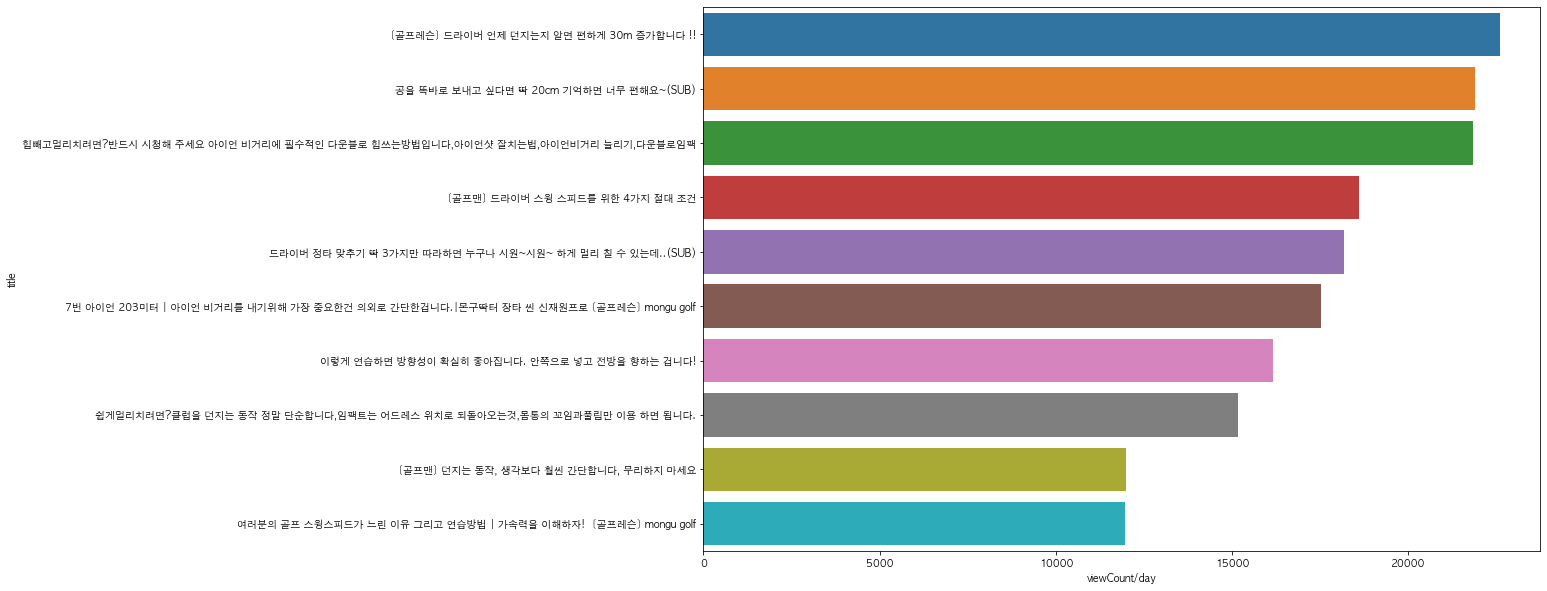

In [8]:
plt.figure(figsize=(15,10))
video_reset_index = video.reset_index()
sns.barplot(x='viewCount/day', y='title', data=video_reset_index.sort_values('viewCount/day', ascending=False)[:10])

In [9]:
df = video.reset_index()
df = df[['title', 'viewCount', 'channel', 'viewCount/day']].sort_values('viewCount', ascending=False)

In [10]:
df['refined'] = df['title'].apply(lambda x:re.sub('[^가-힣\s0-9]', '', x))

In [11]:
sentences = df['refined'].values


word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sentences) # list of str or like
words = word_extractor.extract()



cohesion_score = {word:score.cohesion_forward for word, score in words.items()}


noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(sentences) # list of str like

noun_scores = {noun:score.score for noun, score in nouns.items()}
combined_scores = {noun:score + cohesion_score.get(noun, 0)
    for noun, score in noun_scores.items()}
combined_scores.update(
    {subword:cohesion for subword, cohesion in cohesion_score.items()
    if not (subword in combined_scores)}
)

tokenizer = LTokenizer(scores=combined_scores)

training was done. used memory 0.161 Gbry 0.142 Gb
all cohesion probabilities was computed. # words = 117
all branching entropies was computed # words = 5890
all accessor variety was computed # words = 5890
[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 11298 from 3751 sents. mem=0.163 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=32672, mem=0.180 Gb
[Noun Extractor] batch prediction was completed for 3652 words
[Noun Extractor] checked compounds. discovered 1324 compounds
[Noun Extractor] postprocessing detaching_features : 2351 -> 2166
[Noun Extractor] postprocessing ignore_features : 2166 -> 2119
[Noun Extractor] postprocessing ignore_NJ : 2119 -> 2116
[Noun Extractor] 2116 nouns (1324 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.186 Gb                    
[Noun Extra

In [12]:
df['tokenized'] = df['refined'].apply(lambda x:tokenizer.tokenize(x,remove_r=True))

In [13]:
# 20%
thresh = int(len(df) *0.2)
df20 = df[:thresh]

In [14]:
words = []
for i in df20['tokenized']:
    for k in i:
        words.append(k)   

In [15]:
from collections import Counter
count = Counter(words)
word_dict = dict(count)

## 누적조회수 상위 20%에 많이 등장하는 단어 (상위25개만 display)
## (드라이버 멀리 비거리 아이언 똑바로 백스윙 몸통 다운스윙 장타 어프로치)

In [16]:
sort_orders = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
shortened = sort_orders[:25]
for i in shortened:
	print(i[0], i[1])

골프 562
드라이버 179
스윙 115
방법 109
멀리 97
비거리 93
백스윙 88
아이언 86
연습 85
똑바로 76
워너 61
프로 59
몸통 58
다운스윙 54
쉽게 43
힘빼 41
레슨 37
꼭 34
하는 33
출근길레슨 32
허석프로 32
최대룡프 30
수 30
장타 29
어프로치 29


In [17]:
from wordcloud import WordCloud

In [18]:
stopword = {'골프', '허석프로', '출근길레슨', '박하림프', '하와이골프', '몬구', '조윤성', '오전8시30분', '워너', '김현우프로', 
            '방프로', '최민욱프', '박형준프로', '8시30분', '오전', '3', '그리고', '프로', '영상', '30',
           '오전8시반', '출근길', '최대룡프', '김준년프로', '이기호프로', '닥치고스윙', '고덕호필드레슨', '고덕호초청필드레슨'}
for word in stopword:
    word_dict.pop(word)

In [19]:
wordcloud = WordCloud(font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc', width=500, height=500, background_color='white').generate_from_frequencies(word_dict)

## 누적조회수 상위 20%에 많이 등장하는 단어구름

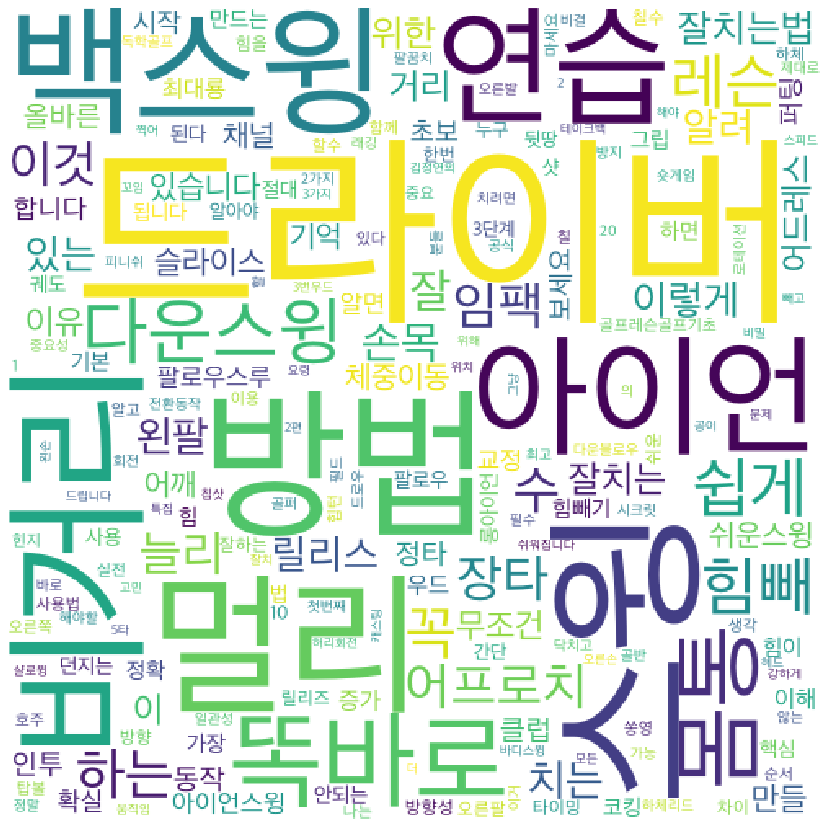

In [20]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
df20viewday = df.sort_values('viewCount/day', ascending=False)[:thresh]

In [22]:
words_perday = []
for i in df20viewday['tokenized']:
    for k in i:
        words_perday.append(k)   

In [23]:
from collections import Counter
count = Counter(words_perday)
word_dict_perday = dict(count)

## 등록일 보정 조회수 상위 20%에 많이 등장하는 단어 (상위25개만 디스플레이)
## (드라이버 멀리 아이언 똑바로 비거리 백스윙 몸통 다운스윙 장타 임팩 슬라이스)   
드라이버+비거리+멀리 + 장타 = 418 횟수 / 누적의 경우 같은 단어 조합이 369회...    
드라이버 멀리 치는 데 대한 관심도가 증가함을 알 수 있음. 

In [24]:
sort_orders = sorted(word_dict_perday.items(), key=lambda x: x[1], reverse=True)
shortened = sort_orders[:25]
for i in shortened:
	print(i[0], i[1])

골프 466
드라이버 215
멀리 113
방법 110
스윙 109
연습 95
아이언 93
비거리 91
똑바로 87
백스윙 82
프로 63
몸통 53
다운스윙 49
레슨 48
쉽게 45
힘빼 44
수 42
허석프로 39
꼭 39
닥치고스윙 39
출근길레슨 38
늘리 34
김준년프로 33
이렇게 31
치는 30


In [25]:
stopword = {'골프', '허석프로', '출근길레슨', '박하림프', '하와이골프', '몬구', '조윤성', '오전8시30분', '워너', '김현우프로', 
            '방프로', '최민욱프', '박형준프로', '8시30분', '오전', '3', '그리고', '프로', '영상', '30',
           '오전8시반', '출근길', '김준년프로', '이기호프로', '최대룡프', '고덕호초청필드레슨', '독학골프', '김정연의', '닥치고스윙'}
for word in stopword:
    word_dict_perday.pop(word)

In [26]:
wordcloud = WordCloud(font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc', width=500, height=500, background_color='white').generate_from_frequencies(word_dict_perday)

## 등록일 보정 누적 조회수 상위 20%에 많이 등장하는 단어구름

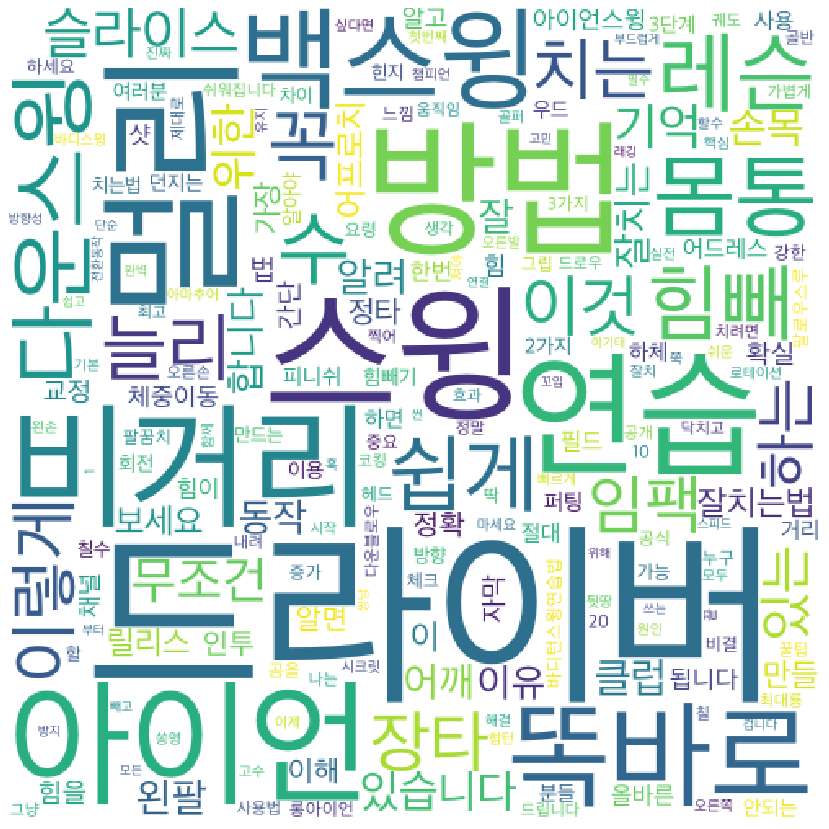

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
words = []
for i in df['tokenized']:
    for k in i:
        words.append(k)   

from collections import Counter
count = Counter(words)
keywords = dict(count)

In [29]:
keywords_item = ['드라이버', '아이언', '퍼터', '우드','퍼팅', '어드레스', '테이크백', '테이크어웨이', '코킹', '힌지',
                '백스윙', '스웨이', '체중', '체중이동', '다운스윙', '임팩', '팔로우', '피니쉬', '피니시', '슬라이스', '훅', '드로우',
                '왼팔', '오른팔',  '팔꿈치',  '머리', '비거리', '멀리', '똑바로']

## 주요 주제어 등장 횟수 (전체 동영상 대비 %)
조회수가 높은 만큼 실제 드라이버, 비거리, 멀리 등의 주제어로 많은 동영상을 제작하고 있음

In [30]:
keyword_dict ={}
for item in keywords_item:
    keyword_dict[item] = keywords[item]

sort_orders = sorted(keyword_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
    percent = i[1]/len(df)*100
    print(i[0], i[1], f'   {percent:.1f}%')

드라이버 598    15.9%
비거리 391    10.4%
백스윙 365    9.7%
아이언 320    8.5%
다운스윙 194    5.2%
멀리 181    4.8%
슬라이스 172    4.6%
똑바로 151    4.0%
임팩 143    3.8%
어드레스 106    2.8%
퍼팅 88    2.3%
체중이동 75    2.0%
우드 53    1.4%
왼팔 50    1.3%
피니쉬 49    1.3%
드로우 43    1.1%
코킹 42    1.1%
훅 35    0.9%
오른팔 34    0.9%
퍼터 28    0.7%
팔로우 26    0.7%
머리 25    0.7%
팔꿈치 23    0.6%
테이크백 19    0.5%
테이크어웨이 14    0.4%
스웨이 14    0.4%
힌지 13    0.3%
체중 8    0.2%
피니시 7    0.2%


### 추가작업(시간날때): 주제어별 기대 조회수 계산하기

In [31]:
total_viewCount = df['viewCount'].sum()
for item in keywords_item:
    keyword_viewCount = df[df['tokenized'].apply(lambda x: item in x)]['viewCount'].sum()
    print(item, '  ', keyword_viewCount, f'   {keyword_viewCount/total_viewCount*100:.1f}%')

드라이버    53003595    22.6%
아이언    26908055    11.5%
퍼터    1017811    0.4%
우드    3947002    1.7%
퍼팅    3917183    1.7%
어드레스    3817886    1.6%
테이크백    914694    0.4%
테이크어웨이    533445    0.2%
코킹    3837146    1.6%
힌지    3199860    1.4%
백스윙    21088165    9.0%
스웨이    335188    0.1%
체중    471163    0.2%
체중이동    3696427    1.6%
다운스윙    13093354    5.6%
임팩    8879045    3.8%
팔로우    2233632    1.0%
피니쉬    1813194    0.8%
피니시    289471    0.1%
슬라이스    7063376    3.0%
훅    734140    0.3%
드로우    1682805    0.7%
왼팔    7706607    3.3%
오른팔    1991401    0.8%
팔꿈치    1347360    0.6%
머리    1027461    0.4%
비거리    27379794    11.7%
멀리    29903203    12.7%
똑바로    27309889    11.6%


In [32]:
df_bin = []

for i in sort_orders:
    percent = i[1]/len(df)*100
    keyword_viewCount = df[df['tokenized'].apply(lambda x: i[0] in x)]['viewCount'].sum()
    print(i[0], i[1], f'   {percent:.1f}%', keyword_viewCount, f'   {keyword_viewCount/total_viewCount*100:.1f}%')
    list_temp = [i[0], i[1], percent, keyword_viewCount, keyword_viewCount/total_viewCount*100]
    df_bin.append(list_temp)

드라이버 598    15.9% 53003595    22.6%
비거리 391    10.4% 27379794    11.7%
백스윙 365    9.7% 21088165    9.0%
아이언 320    8.5% 26908055    11.5%
다운스윙 194    5.2% 13093354    5.6%
멀리 181    4.8% 29903203    12.7%
슬라이스 172    4.6% 7063376    3.0%
똑바로 151    4.0% 27309889    11.6%
임팩 143    3.8% 8879045    3.8%
어드레스 106    2.8% 3817886    1.6%
퍼팅 88    2.3% 3917183    1.7%
체중이동 75    2.0% 3696427    1.6%
우드 53    1.4% 3947002    1.7%
왼팔 50    1.3% 7706607    3.3%
피니쉬 49    1.3% 1813194    0.8%
드로우 43    1.1% 1682805    0.7%
코킹 42    1.1% 3837146    1.6%
훅 35    0.9% 734140    0.3%
오른팔 34    0.9% 1991401    0.8%
퍼터 28    0.7% 1017811    0.4%
팔로우 26    0.7% 2233632    1.0%
머리 25    0.7% 1027461    0.4%
팔꿈치 23    0.6% 1347360    0.6%
테이크백 19    0.5% 914694    0.4%
테이크어웨이 14    0.4% 533445    0.2%
스웨이 14    0.4% 335188    0.1%
힌지 13    0.3% 3199860    1.4%
체중 8    0.2% 471163    0.2%
피니시 7    0.2% 289471    0.1%


In [33]:
keyword_df = pd.DataFrame(df_bin, columns=['주제어', '등장회수', '등장비중', '누적조회수', '조회수비중'])

In [34]:
keyword_df

,주제어,등장회수,등장비중,누적조회수,조회수비중
0,드라이버,598,15.942415,53003595,22.579570
1,비거리,391,10.423887,27379794,11.663812
2,백스윙,365,9.730738,21088165,8.983574
3,아이언,320,8.531058,26908055,11.462851
4,다운스윙,194,5.171954,13093354,5.577778
5,멀리,181,4.825380,29903203,12.738786
6,슬라이스,172,4.585444,7063376,3.009003
7,똑바로,151,4.025593,27309889,11.634032
8,임팩,143,3.812317,8879045,3.782480
9,어드레스,106,2.825913,3817886,1.626422


Text(0.5, 0, '비중 %')

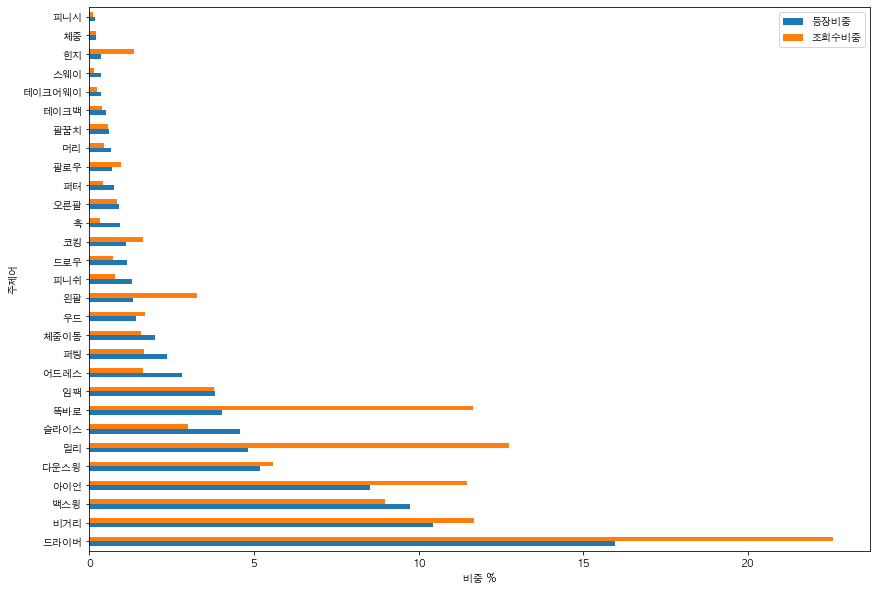

In [35]:
keyword_df.set_index('주제어')[['등장비중', '조회수비중']].plot(kind='barh', figsize=(14, 10))
plt.xlabel('비중 %')